<a href="https://colab.research.google.com/github/Taryn-Cail/Python-Group-Project-2704/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2704 Group Project

## Jackson McIntyre, Nicolas Serrano and Taryn Cail

This project analyzes the relation

In [ ]:
#Testing: students with lower gpa have higher mental stress levels
#Variables: GPA (independnt), Mental Stress Level (dependent)

#Calc average stress levels for those with different GPA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#Load the data set with only the required columns
df = pd.read_csv('data.csv')
df = df[['Student_ID', 'Study_Hours_Per_Day', 'GPA', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
print(df)

      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

In [ ]:
#Grouping GPA into levels
def categorize_gpa(gpa):
  #0-2 low
  #2-3 med
  #3-4 high
  if gpa <= 2.5:
    return 'Low'
  elif gpa >2.5 and gpa <= 3:
    return 'Med'
  elif gpa > 3:
    return 'High'

#Create new col for GPA groups
df['GPA Level'] = df['GPA'].apply(categorize_gpa)
print(df)
print(type(df)) #Data frame
print(type(df['GPA Level'])) #Each col is a Series



      Student_ID  Study_Hours_Per_Day   GPA  Extracurricular_Hours_Per_Day  \
0              1                  6.9  2.99                            3.8   
1              2                  5.3  2.75                            3.5   
2              3                  5.1  2.67                            3.9   
3              4                  6.5  2.88                            2.1   
4              5                  8.1  3.51                            0.6   
...          ...                  ...   ...                            ...   
1995        1996                  6.5  3.32                            0.2   
1996        1997                  6.3  2.65                            2.8   
1997        1998                  6.2  3.14                            0.0   
1998        1999                  8.1  3.04                            0.7   
1999        2000                  9.0  3.58                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0           

In [ ]:
#Calculate mean stress for GPA groups
#groupby() groups by col
#[]"Mental Stress Level"].mean() calculates mean stress level for each group
#resetindex() converts back into data
gpa_order = ['Low', 'Med', 'High']
gpa_by_studyH = df.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()
gpa_by_studyH['GPA Level'] = pd.Categorical(gpa_by_studyH['GPA Level'], categories=gpa_order,ordered=True)
gpa_by_studyH = gpa_by_studyH.sort_values('GPA Level')
print(gpa_by_studyH)


  GPA Level  Study_Hours_Per_Day
1       Low             5.727027
2       Med             6.335725
0      High             8.154581


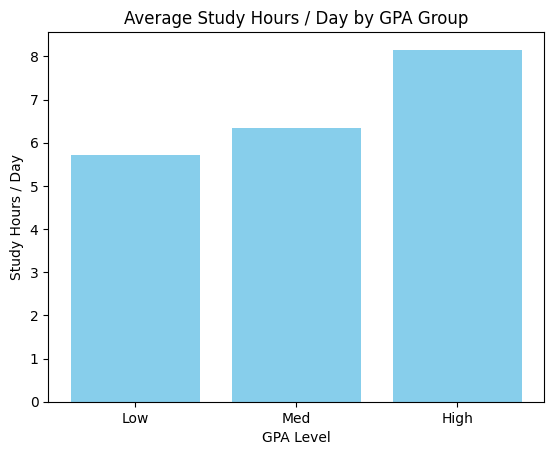

In [ ]:
#Visualize - bar graph
plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group")
plt.savefig("bar_graph.svg", format="svg", bbox_inches="tight")
plt.show()

[]

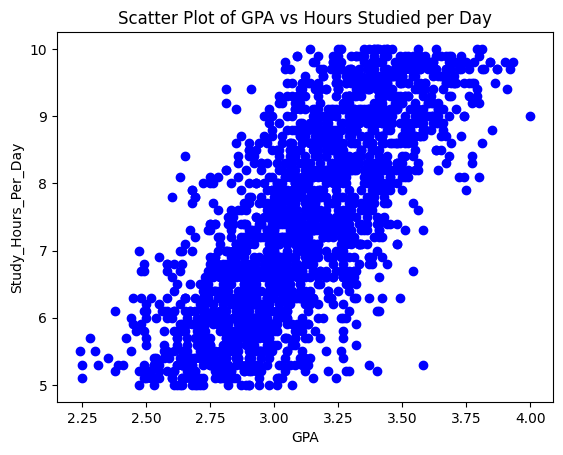

In [ ]:
#Visualize - scatter plot

plt.clf()
plt.scatter(df['GPA'], df['Study_Hours_Per_Day'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Hours Studied per Day')
plt.savefig("scatter_plot.svg", format="svg", bbox_inches="tight")
plt.plot()

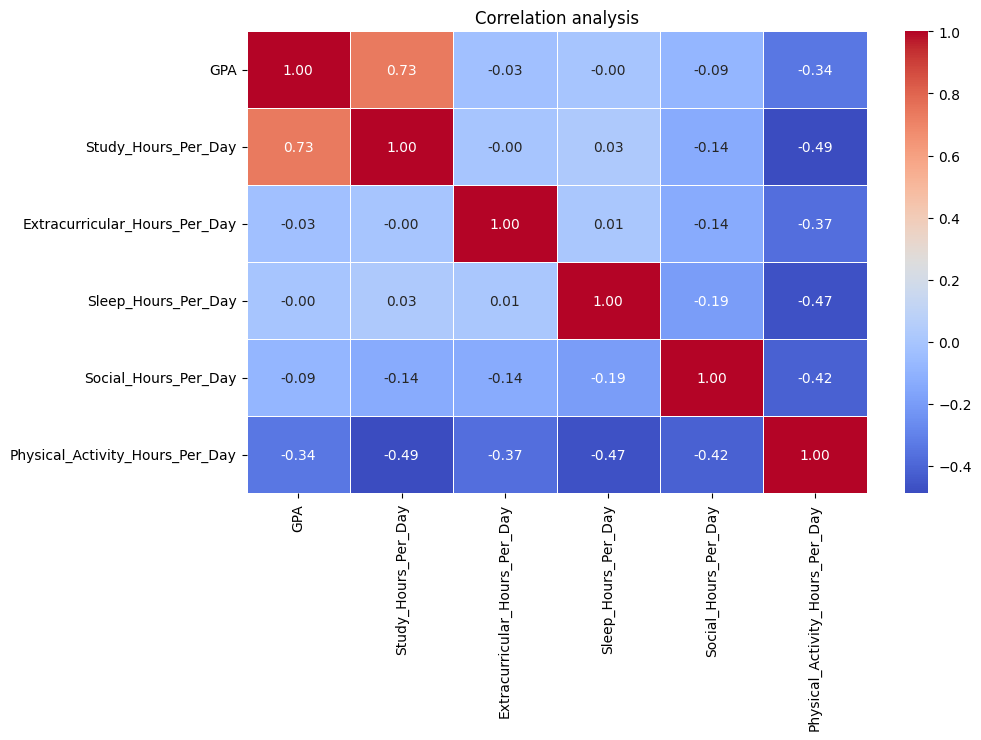

In [ ]:
correltaion_data = df[['GPA','Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
corr_matrix = correltaion_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation analysis")
plt.savefig("heatmap.svg", format="svg", bbox_inches="tight")
plt.show()


In [ ]:
# Define the dependent (y) and independent (x) variables
X = df['Study_Hours_Per_Day']
Y = df['GPA']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     2340.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:34:01   Log-Likelihood:                 354.75
No. Observations:                2000   AIC:                            -705.5
Df Residuals:                    1998   BIC:                            -694.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9642    

In [ ]:
# Perdorm Pearson correlation test
r, p_value = stats.pearsonr(df['Study_Hours_Per_Day'], df['GPA'])

# Print Results
print(f"Pearson correlation coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.7345
P-value: 0.0000


Positive r means positive relationship between Study hours per day and GPA

A value higher than 0.7 indicates there is a strong positive linear relationship

A p value < 0.05 is and indicator that the correlation is statistically significant

We can confidently reject the null hypothesis and conclude that more study hours are associated with higher GPA

Mean Squared Error (MSE): 0.04
R² Score: 0.55
Coefficient (slope): 0.153
Intercept: 1.969


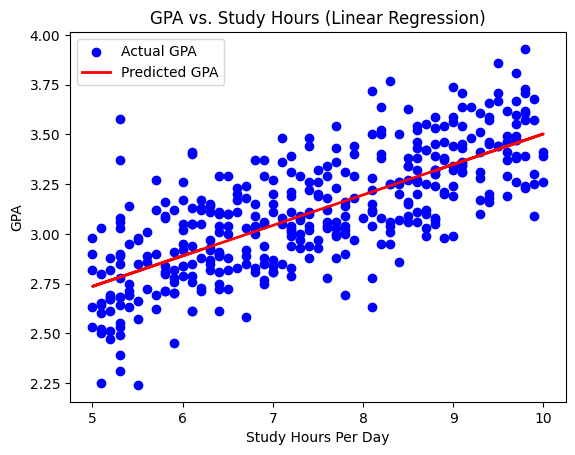

In [ ]:
#Predictive Model: Simple Linear Regression


#Prepare Data
X = df[['Study_Hours_Per_Day']]
y = df['GPA']

#Split data into Training/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the model
#Predict on test data
y_pred = model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")  # Closer to 1 is better

#Interpret results
print(f"Coefficient (slope): {model.coef_[0]:.3f}") # Example output: Coefficient: 0.145 means each additional study hour increases GPA by 0.145 points (on average).
print(f"Intercept: {model.intercept_:.3f}") #     This is the predicted GPA when study hours = 0.

#Visualize Predictions
plt.scatter(X_test, y_test, color='blue', label='Actual GPA')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.title('GPA vs. Study Hours (Linear Regression)')
plt.legend()

plt.show()

#Now using our predictive model to make predictions for new values


In [ ]:
#Now using our predictive model to make predictions for new values

study_hours = [[12]]
predicted_gpa = model.predict(study_hours)
print(f"Predicted GPA for 7 hours/day: {predicted_gpa[0]:.2f}\n\n")

Predicted GPA for 7 hours/day: 3.81




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Making Linear Discriminate Analysis as a predictive model

# Select only study hours as the predictor
X = df[['Study_Hours_Per_Day']]
y = df['GPA Level']  # Categorical target (Low/Med/High)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7575

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.80      0.82       259
         Low       0.00      0.00      0.00         8
         Med       0.62      0.71      0.66       133

    accuracy                           0.76       400
   macro avg       0.49      0.51      0.50       400
weighted avg       0.75      0.76      0.75       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


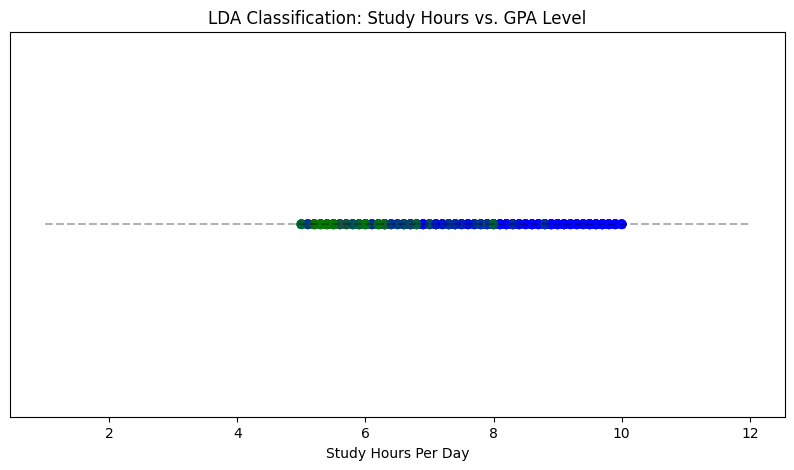

In [ ]:
#Visual decision boundaries

import numpy as np
import matplotlib.pyplot as plt

# Create a range of study hours (1-12 hrs)
study_hours_range = np.linspace(1, 12, 500).reshape(-1, 1)

# Predict GPA levels for these hours
gpa_predictions = lda.predict(study_hours_range)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_train, [0] * len(X_train), c=y_train.map({'Low': 'red', 'Med': 'green', 'High': 'blue'}), alpha=0.3)
plt.plot(study_hours_range, [0] * len(study_hours_range), c='black', linestyle='--', alpha=0.3)
plt.yticks([])
plt.xlabel('Study Hours Per Day')
plt.title('LDA Classification: Study Hours vs. GPA Level')
plt.show()

In [ ]:
#Using my own values in predictive model

std_hrs = 0 #ex. 5.2 hrs per day
input_data = [[std_hrs]]

predicted_gpa_levels = lda.predict(input_data)[0]

probabilities = lda.predict_proba(input_data)[0]

print(f"\nFor {std_hrs} study hours/day:")
print(f"→ Predicted GPA Level: {predicted_gpa_levels}")
print(f"→ Probabilities: Low={probabilities[0]:.2f}, Med={probabilities[1]:.2f}, High={probabilities[2]:.2f}")
print()
print()


For 0 study hours/day:
→ Predicted GPA Level: Med
→ Probabilities: Low=0.00, Med=0.40, High=0.60




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
